# 1. Đọc hiểu dữ liệu

In [73]:

import math
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [74]:

df=pd.read_csv("Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [76]:

df.nunique().sort_values()

mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
prefarea              2
furnishingstatus      3
bathrooms             4
stories               4
parking               4
bedrooms              6
price               219
area                284
dtype: int64

# Xem các thống kê cơ bản các cột dạng số

In [77]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [78]:
Categorical=["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea","furnishingstatus"]
Numeric=["price","area","bedrooms","bathrooms","stories","parking"]
print("Categorical:",Categorical)
print("Numeric:",Numeric)

Categorical: ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
Numeric: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']


# Kiểm tra mức độ tương quan các cột dạng số

In [79]:

df[Numeric].corr()

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


# 2.Trực quan hóa dữ liệu


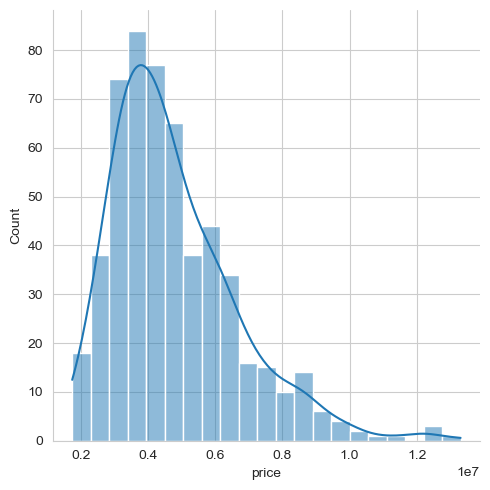

In [80]:
sns.displot(data=df, x='price',kde=True)

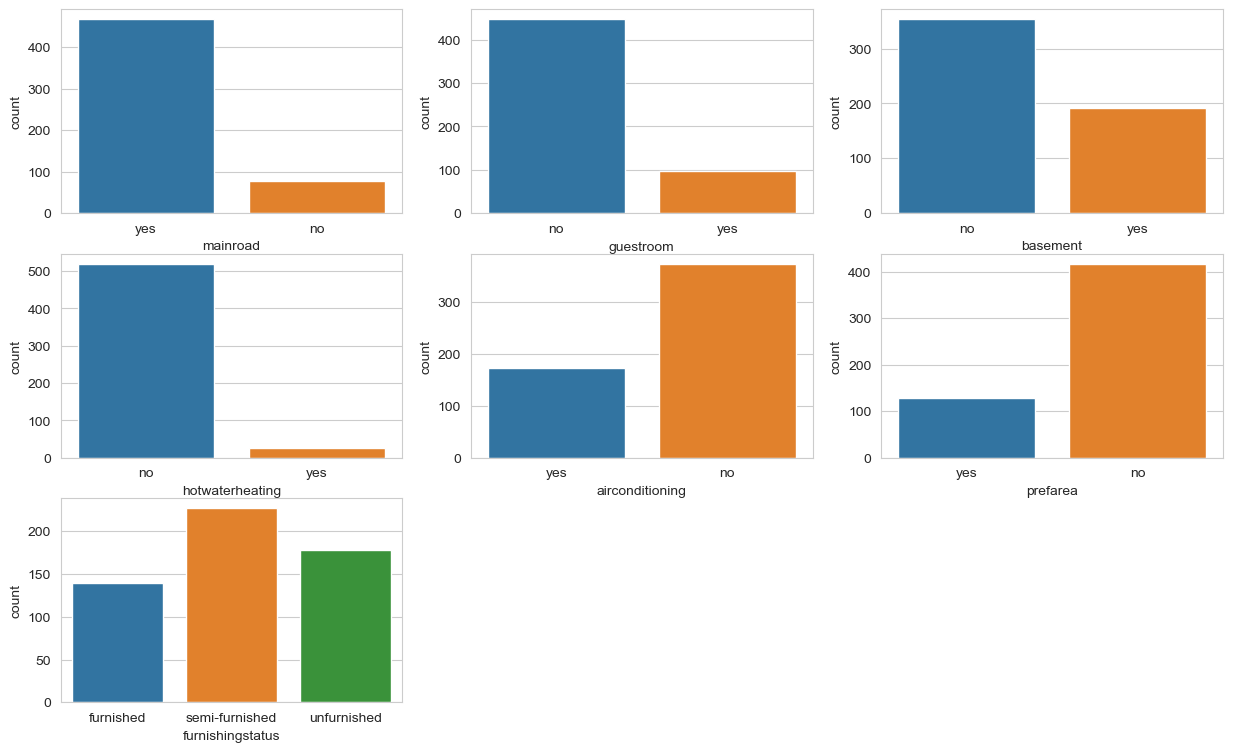

In [81]:
plt.figure(figsize=(15,9))
j=0
for i in Categorical:
    plt.subplot(3,3,j+1)
    sns.countplot(data=df, x=i)
    j+=1
    

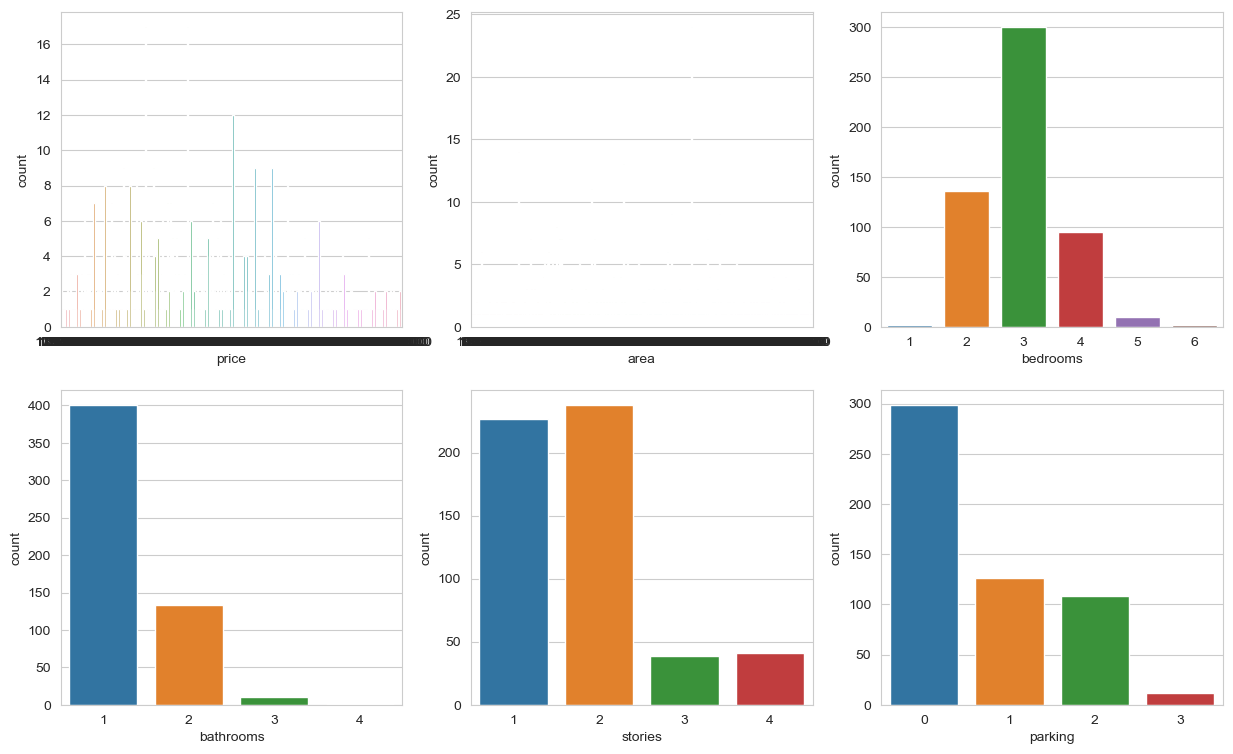

In [82]:
plt.figure(figsize=(15,9))
j=0
for i in Numeric:
    plt.subplot(2,3,j+1)
    sns.countplot(data=df, x=i)
    j+=1

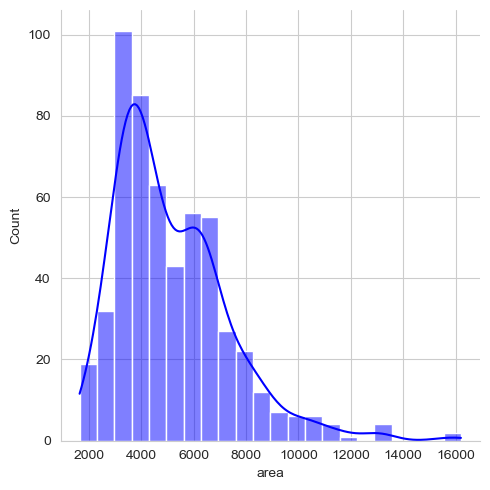

In [83]:
sns.displot(data=df,x='area',color='blue',kde=True)

# 3.Tiền xử lý dữ liệu


## Kiểm tra các dữ liệu bị thiếu


In [84]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

# Xóa bỏ các bản ghi trùng lặp

In [85]:
df.drop_duplicates(inplace=True)
df.shape

(545, 13)

## Mã hóa cột dữ liệu dạng phân loại sang dạng số

In [86]:
df['mainroad'] = df['mainroad'].map({'yes': 1, 'no': 0})
df['guestroom'] = df['guestroom'].map({'yes': 1, 'no': 0})
df['basement'] = df['basement'].map({'yes': 1, 'no': 0})
df['hotwaterheating'] = df['hotwaterheating'].map({'yes': 1, 'no': 0})
df['airconditioning'] = df['airconditioning'].map({'yes': 1, 'no': 0})
df['prefarea'] = df['prefarea'].map({'yes': 1, 'no': 0})
df['furnishingstatus']=df['furnishingstatus'].map({'unfurnished':0, 'semi-furnished':1, 'furnished':2})
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2


#  Loại bỏ dữ liệu ngoại lai


In [87]:
    print("Dữ liệu ban đầu có kích thước:",df.shape)
    Q1 = df['area'].quantile(0.25)
    Q3 = df['area'].quantile(0.75)
    IQR = Q3 - Q1
    df = df[df['area'] <= (Q3+(1.5*IQR))]
    df = df[df['area'] >= (Q1-(1.5*IQR))]
    df = df.reset_index(drop=True)
    print("Dữ liệu sau khi loại bỏ dữ liệu ngoại lai có kích thước:",df.shape)


Dữ liệu ban đầu có kích thước: (545, 13)
Dữ liệu sau khi loại bỏ dữ liệu ngoại lai có kích thước: (533, 13)


# Chia tập dữ liệu

In [88]:
#Khai báo biến mục tiêu và các biến đọc lập
x = df.drop(columns = 'price')
y = df['price']
#Chia tập dữ liệu
X, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
X = np.concatenate((np.ones((len(y_train), 1)), X), axis=1)
X


array([[1.00e+00, 3.75e+03, 3.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [1.00e+00, 6.04e+03, 3.00e+00, ..., 2.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 3.09e+03, 3.00e+00, ..., 0.00e+00, 0.00e+00, 1.00e+00],
       ...,
       [1.00e+00, 6.00e+03, 4.00e+00, ..., 2.00e+00, 0.00e+00, 1.00e+00],
       [1.00e+00, 4.28e+03, 2.00e+00, ..., 2.00e+00, 0.00e+00, 1.00e+00],
       [1.00e+00, 4.12e+03, 2.00e+00, ..., 1.00e+00, 0.00e+00, 1.00e+00]])

# 4Gradient Descent


In [ ]:
#Khai báo biến mục tiêu và các biến đọc lập
x = df.drop(columns = 'price')
y = df['price']
#Chia tập dữ liệu
X, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
X = np.concatenate((np.ones((len(y_train), 1)), X), axis=1)
theta = np.zeros(12 + 1)
def compute_cost(X, y_train, theta):
    m = len(y_train)
    J = np.sum((np.dot(X, theta) - y_train) ** 2) / (2 * m)
    return J

def gradient_descent(X, y_train, theta, lr, epochs):
    m = len(y_train)
    J_history = np.zeros(epochs)
    for iter in range(epochs):
        error = np.dot(X, theta) - y_train
        gradient = np.dot(X.T, error) / m
        theta = theta - lr * gradient
        J_history[iter] = compute_cost(X, y_train, theta)

    return theta, J_history

# Hyperparameters
lr = 0.00000001
epochs = 100000
theta, J_history = gradient_descent(X, y_train, theta, lr, epochs)

# Print the parameters learned by gradient descent
print("Parameters theta:", theta)
J_history

# 4 Đánh giá mô hình



# Tập Train

Sai số trung bình: 219498.63461992797


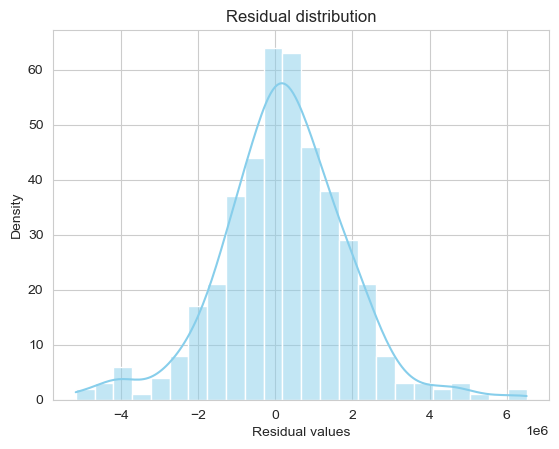

In [94]:
y_pred_train=np.dot(X, theta)
residual=y_train - y_pred_train
sns.set_style("whitegrid")
print("Sai số trung bình:",residual.mean())
sns.histplot(residual,color='skyblue',kde=True)
plt.title("Residual distribution")
plt.xlabel("Residual values")
plt.ylabel("Density")
plt.show()


In [95]:
x_test = np.concatenate((np.ones((len(y_test), 1)), x_test), axis=1)
y_pred_train = np.dot(X,theta)
y_pred_test  = np.dot(x_test,theta)
print("The mean absolute error is: ",mean_absolute_error(y_pred_test,y_test))
print("The mean squared error is: ",mean_squared_error(y_pred_test,y_test))
print("The R2 score is: ",r2_score(y_pred_test,y_test))

The mean absolute error is:  1363751.5778508952
The mean squared error is:  3337164519803.248
The R2 score is:  -0.04124587407350688


# Xem sự tương quan giữa y_test ,y_pred_test 

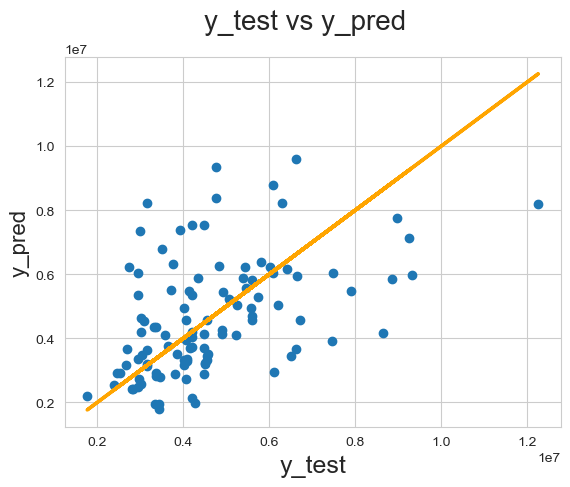

In [96]:
fig = plt.figure()
plt.scatter(y_test,y_pred_test)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)

f = lambda x: x


x = np.array(y_test)

plt.plot(x,f(x),lw=2.5, c="orange")